<a href="https://colab.research.google.com/github/parkjunseo74/Deep-learning-for-AI/blob/main/3%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [2]:
#mnist 데이터셋을 불러오는 코드
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape
#28*28 규격의 60000개의 데이터

(60000, 28, 28)

In [4]:
train_images[0]
#show data 버튼을 누르기 전에는 그림으로 출력됨

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [5]:
len(train_labels)

60000

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
test_images.shape
#28*28 규격의 10000개의 데이터

(10000, 28, 28)

In [11]:
test_images.dtype

dtype('uint8')

In [12]:
test_images.ndim

3

In [13]:
len(test_labels)

10000

In [14]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [15]:
#딥러닝 모델을 규정하는 과정
#28*28 데이터를 512 크기의 데이터, 10 크기의 데이터(이 경우에는 0~9까지의 숫자)로 형태를 변환시킴
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [16]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [17]:
#28*28 데이터를 784 크기의 평면적인 데이터로 변형시키는 과정
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [18]:
test_images.dtype

dtype('float32')

In [19]:
test_images.shape

(10000, 784)

In [20]:
test_images.ndim

2

**"Fitting" the model**

In [21]:
#epochs는 전체 데이터셋 모델에 적용시켜 훈련시키는 횟수
#batch_size는 훈련을 위해 나눈 데이터의 개수(데이터 크기 문제로 인해 한 번에 전체 데이터셋을 넣어 훈련시킬 수 없음)
#batch_size=128일 때 469, batch_size=100일 때 600, batch_size=10일 때 6000
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.2623 - accuracy: 0.9239
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1054 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0700 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0506 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0382 - accuracy: 0.9888


**Using the model to make predictions**

In [22]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 61ms/step


array([2.43762173e-07, 1.18630075e-08, 4.53836074e-05, 1.02417303e-04,
       1.48177609e-10, 1.82114860e-07, 5.88542323e-12, 9.99831080e-01,
       9.63118509e-07, 1.96349629e-05], dtype=float32)

In [23]:
#argmax() : 함수 f(x)를 최대로 하는 x 값을 구하는 함수(즉, 모델에서 제시한 정답)
predictions[0].argmax()

7

In [24]:
#위의 함수에서 7을 정답으로 제시했기에, 7의 확률을 표시
predictions[0][7]

0.9998311

In [25]:
#정답 확인
test_labels[0]

7

**Evaluating the model on new data**

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0616 - accuracy: 0.9791
test_acc: 0.9790999889373779


## Data representations for neural networks

####tensor : a container for data

### Scalars (rank-0 tensors)

In [27]:
import numpy as np
x = np.array(12)
x

array(12)

In [28]:
x.ndim

0

### Vectors (rank-1 tensors)

In [29]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [30]:
x.ndim

1

### Matrices (rank-2 tensors)

In [31]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [32]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [33]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [34]:
train_images.ndim

3

In [35]:
train_images.shape

(60000, 28, 28)

In [36]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

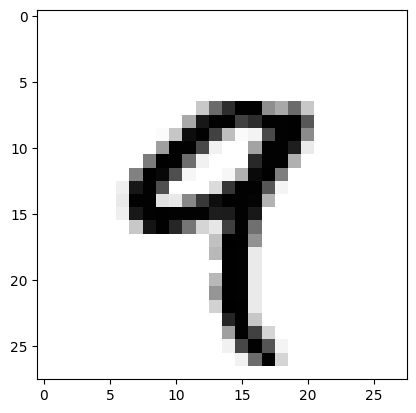

In [39]:
import matplotlib.pyplot as plt
#train_images[4]를 시각화함
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [38]:
train_labels[4]

9

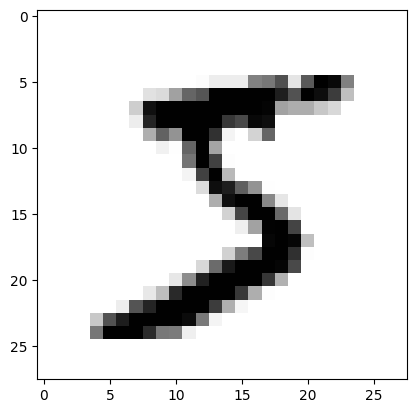

In [41]:
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [42]:
train_labels[0]

5

### Manipulating tensors in NumPy

In [43]:
train_images.shape

(60000, 28, 28)

In [44]:
#train_images 중 [10:100] 부분의 데이터를 추출
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [45]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [46]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [47]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [48]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

In [49]:
my_slice = train_images[100:200, 5:20, 5:20]
my_slice.shape

(100, 15, 15)

### The notion of data batches

In [50]:
batch = train_images[:128]

In [51]:
batch = train_images[128:256]

In [52]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [53]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [55]:
import numpy as np

aa=np.array([1,2,3,-1])
aaa=np.array([[1,2,3,-1],[1,-1,-1,0]])

In [56]:
# len(x.shape)==2로 되어 있기에 투입하는 데이터의 형태는 2차원이어야 함
naive_relu(aa)

AssertionError: 

In [57]:
# 기존 데이터셋 함수의 결과로 변형되지 않도록 x=x.copy()를 사용함
naive_relu(aaa)

array([[1, 2, 3, 0],
       [1, 0, 0, 0]])

In [54]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [58]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

# 함수 밖에서 직접적으로 z=x+y 덧셈을 함. 빠른 속도로 연산됨
t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [59]:
# 함수를 통해서 z=x+y 덧셈을 하므로 훨씬 많은 절차를 거쳐야 함. 연산 속도가 오래 걸림
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.77 s


### Broadcasting

모양이 다른 배열들 간의 연산이 어떤 조건을 만족했을 때 가능해지도록 배열을 자동적으로 변환하는 것

조건1
두 배열 간의 연산에서 최소한 하나의 배열의 차원이 1인 경우

조건2
차원에 대해 축의 길이가 동일한 경우

In [82]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [83]:
# 10개의 랜덤 데이터 생성
y

array([0.30835893, 0.05398731, 0.33912723, 0.69077175, 0.73235302,
       0.39188707, 0.13233724, 0.02350994, 0.15685948, 0.93613599])

In [84]:
y = np.expand_dims(y, axis=0)

In [85]:
# 데이터의 차원을 늘림
y

array([[0.30835893, 0.05398731, 0.33912723, 0.69077175, 0.73235302,
        0.39188707, 0.13233724, 0.02350994, 0.15685948, 0.93613599]])

In [86]:
Y = np.concatenate([y] * 32, axis=0)

In [87]:
# 한 차원을 32개의 열로 증가시킴. 궁극적으로 X와 축의 길이를 맞추기 위해서임
Y

array([[0.30835893, 0.05398731, 0.33912723, 0.69077175, 0.73235302,
        0.39188707, 0.13233724, 0.02350994, 0.15685948, 0.93613599],
       [0.30835893, 0.05398731, 0.33912723, 0.69077175, 0.73235302,
        0.39188707, 0.13233724, 0.02350994, 0.15685948, 0.93613599],
       [0.30835893, 0.05398731, 0.33912723, 0.69077175, 0.73235302,
        0.39188707, 0.13233724, 0.02350994, 0.15685948, 0.93613599],
       [0.30835893, 0.05398731, 0.33912723, 0.69077175, 0.73235302,
        0.39188707, 0.13233724, 0.02350994, 0.15685948, 0.93613599],
       [0.30835893, 0.05398731, 0.33912723, 0.69077175, 0.73235302,
        0.39188707, 0.13233724, 0.02350994, 0.15685948, 0.93613599],
       [0.30835893, 0.05398731, 0.33912723, 0.69077175, 0.73235302,
        0.39188707, 0.13233724, 0.02350994, 0.15685948, 0.93613599],
       [0.30835893, 0.05398731, 0.33912723, 0.69077175, 0.73235302,
        0.39188707, 0.13233724, 0.02350994, 0.15685948, 0.93613599],
       [0.30835893, 0.05398731, 0.3391272

In [88]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [67]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [89]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [90]:
# 1차원 32개의 데이터
x

array([0.98149103, 0.92736497, 0.12886707, 0.78923773, 0.26504852,
       0.20627775, 0.78161419, 0.34615702, 0.42774325, 0.92160934,
       0.19231128, 0.43637531, 0.90952645, 0.17576033, 0.38908526,
       0.25083982, 0.75578107, 0.91372214, 0.88010272, 0.70704059,
       0.14884254, 0.94451558, 0.8645353 , 0.28917332, 0.71953885,
       0.28997055, 0.27944187, 0.21793586, 0.33616882, 0.7234605 ,
       0.43437164, 0.91973171])

In [69]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [70]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [71]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [72]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [76]:
train_images = train_images.reshape((60000, 28 * 28))

In [77]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [78]:
# (3,2)차원의 데이터를 (6,1)로 전환
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [79]:
# np.transpose()는 행렬 전환
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [92]:
# GradientTape()는 자동 미분 기능의 함수임
# tf.Variable(0.)의 .은 float 데이터의 형태를 맞춰주는 역할을 함. 빼면 안 됨
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [93]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [95]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [96]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [97]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [98]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.7514359 , 0.7514359 ],
        [0.08428669, 0.08428669]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [100]:
# Define the variables
x = tf.Variable(2.)
y = tf.Variable(1.)

# Define the function
f = x * x * y + x * y + 3 * y

# Compute the gradients
with tf.GradientTape(persistent=True) as tape:
    f = x * x * y + x * y + 3 * y

grad_of_f_wrt_xy = tape.gradient(f, [x,y])

In [103]:
grad_of_f_wrt_xy

[<tf.Tensor: shape=(), dtype=float32, numpy=5.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.0>]

In [101]:
x = tf.constant(np.array([1.,4.,3.]).reshape(1,3), dtype=tf.float32)
W = tf.Variable(tf.random.uniform((3,2)), dtype=tf.float32)
b = tf.Variable(tf.zeros((2,)), dtype=tf.float32)

with tf.GradientTape(persistent=True) as tape:
    z = tf.matmul(x,W) + b
grad_of_z_wrt_Wb = tape.gradient(z, [W,b])

In [102]:
grad_of_z_wrt_Wb

[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[1., 1.],
        [4., 4.],
        [3., 3.]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 1.], dtype=float32)>]

In [113]:
x = tf.constant(np.array([1.,4.,3.]).reshape(1,3), dtype=tf.float32)
W = tf.Variable(tf.random.uniform((3,2)), dtype=tf.float32)
b = tf.Variable(tf.zeros((2,)), dtype=tf.float32)

with tf.GradientTape(persistent=True) as tape:
    z = (tf.matmul(x,W) + b)**3
grad_of_z_wrt_Wb = tape.gradient(z, [W,b])

In [114]:
grad_of_z_wrt_Wb

[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 15.792706,  90.7562  ],
        [ 63.170822, 363.0248  ],
        [ 47.378117, 272.26862 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([15.792706, 90.7562  ], dtype=float32)>]

## Looking back at our first example

In [104]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [105]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [106]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [107]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2620 - accuracy: 0.9242
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1060 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0708 - accuracy: 0.9785
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0499 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0386 - accuracy: 0.9882


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [108]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [109]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [110]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [115]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [116]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [117]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [118]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [119]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [120]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 4.80
loss at batch 100: 2.21
loss at batch 200: 2.18
loss at batch 300: 2.08
loss at batch 400: 2.18
Epoch 1
loss at batch 0: 1.88
loss at batch 100: 1.85
loss at batch 200: 1.80
loss at batch 300: 1.70
loss at batch 400: 1.79
Epoch 2
loss at batch 0: 1.56
loss at batch 100: 1.55
loss at batch 200: 1.48
loss at batch 300: 1.42
loss at batch 400: 1.47
Epoch 3
loss at batch 0: 1.30
loss at batch 100: 1.32
loss at batch 200: 1.21
loss at batch 300: 1.20
loss at batch 400: 1.25
Epoch 4
loss at batch 0: 1.10
loss at batch 100: 1.13
loss at batch 200: 1.02
loss at batch 300: 1.04
loss at batch 400: 1.08
Epoch 5
loss at batch 0: 0.96
loss at batch 100: 1.00
loss at batch 200: 0.88
loss at batch 300: 0.92
loss at batch 400: 0.97
Epoch 6
loss at batch 0: 0.85
loss at batch 100: 0.89
loss at batch 200: 0.78
loss at batch 300: 0.83
loss at batch 400: 0.88
Epoch 7
loss at batch 0: 0.77
loss at batch 100: 0.81
loss at batch 200: 0.70
loss at batch 300: 0.76
loss at batch 40

### Evaluating the model

In [121]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Summary